## Использование Push-уведомлений для уменьшения оттока клиентов, на примере данных из магазина "H&M"

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import time  
import matplotlib.pyplot as plt
from scipy import stats





%matplotlib inline 

In [54]:
dt = pd.read_csv('transactions_train_1mln.csv', encoding='windows-1251', sep=',')

In [55]:
dt

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,20897655,2020-01-03,af4658f8651730d6aa32c8b66f677a73a62ff2074b8443...,803757004,0.016932,2
1,9771050,2019-05-03,b1dadb55234d5df0135bc96f418d7184121937aefe2988...,662344015,0.032661,2
2,2018540,2018-11-01,a49a517a5e703a4b7d8c159a12a832f7dc917023cc37d5...,640613002,0.011847,2
3,26802034,2020-06-04,7a8ae54f930bb455f0cc3c3edf2dda713811ddd62ce488...,816423002,0.025407,2
4,20447952,2019-12-21,b7f4eaf989e5702ca3752adf68f3c51a7e327f62495529...,777070005,0.030492,1
...,...,...,...,...,...,...
999995,28928970,2020-07-12,70a83da26e416169a9d35c39395764bf77fb756f09d29e...,877014005,0.033153,1
999996,11040801,2019-05-30,2bc1317b6db05a3596dc281f88eff94a472f87b93ff246...,681385001,0.025407,2
999997,1480996,2018-10-21,bf698fdd9233f9bb6f1a835c2dfc169756219e5f4cb5fd...,667499018,0.025407,2
999998,14810532,2019-07-31,071e56e1fbbdda240e4fa1567e65a893f1da91cb44b78d...,697050017,0.010153,2


In [56]:
dt = dt.drop(['sales_channel_id','Unnamed: 0'], axis =1)

In [57]:
dt

,t_dat,customer_id,article_id,price
0,2020-01-03,af4658f8651730d6aa32c8b66f677a73a62ff2074b8443...,803757004,0.016932
1,2019-05-03,b1dadb55234d5df0135bc96f418d7184121937aefe2988...,662344015,0.032661
2,2018-11-01,a49a517a5e703a4b7d8c159a12a832f7dc917023cc37d5...,640613002,0.011847
3,2020-06-04,7a8ae54f930bb455f0cc3c3edf2dda713811ddd62ce488...,816423002,0.025407
4,2019-12-21,b7f4eaf989e5702ca3752adf68f3c51a7e327f62495529...,777070005,0.030492
...,...,...,...,...
999995,2020-07-12,70a83da26e416169a9d35c39395764bf77fb756f09d29e...,877014005,0.033153
999996,2019-05-30,2bc1317b6db05a3596dc281f88eff94a472f87b93ff246...,681385001,0.025407
999997,2018-10-21,bf698fdd9233f9bb6f1a835c2dfc169756219e5f4cb5fd...,667499018,0.025407
999998,2019-07-31,071e56e1fbbdda240e4fa1567e65a893f1da91cb44b78d...,697050017,0.010153


> `t_dat` : Дата покупки  
> `customer_id` : id клиента <br>
> `article_id` : Aртикул приобретенного товара   
> `price`: Цена товара  
 


Добавим столбец со значением даты покупки в формате Unix: 

In [58]:
date_= []
for i in dt['t_dat']:
    date_2= time.mktime(datetime.datetime.strptime(i,"%Y-%m-%d").timetuple())
    date_.append(date_2)
dt['datetime'] = date_
dt

,t_dat,customer_id,article_id,price,datetime
0,2020-01-03,af4658f8651730d6aa32c8b66f677a73a62ff2074b8443...,803757004,0.016932,1.577992e+09
1,2019-05-03,b1dadb55234d5df0135bc96f418d7184121937aefe2988...,662344015,0.032661,1.556824e+09
2,2018-11-01,a49a517a5e703a4b7d8c159a12a832f7dc917023cc37d5...,640613002,0.011847,1.541012e+09
3,2020-06-04,7a8ae54f930bb455f0cc3c3edf2dda713811ddd62ce488...,816423002,0.025407,1.591211e+09
4,2019-12-21,b7f4eaf989e5702ca3752adf68f3c51a7e327f62495529...,777070005,0.030492,1.576868e+09
...,...,...,...,...,...
999995,2020-07-12,70a83da26e416169a9d35c39395764bf77fb756f09d29e...,877014005,0.033153,1.594494e+09
999996,2019-05-30,2bc1317b6db05a3596dc281f88eff94a472f87b93ff246...,681385001,0.025407,1.559156e+09
999997,2018-10-21,bf698fdd9233f9bb6f1a835c2dfc169756219e5f4cb5fd...,667499018,0.025407,1.540062e+09
999998,2019-07-31,071e56e1fbbdda240e4fa1567e65a893f1da91cb44b78d...,697050017,0.010153,1.564513e+09


In [81]:
dt = dt.sort_values(['t_dat'], ascending = True)

### Проверка данных

# ______

### Основная часть

In [82]:
dt

,t_dat,customer_id,article_id,price,datetime
68834,2018-09-20,2bf68bac40e37b09ceee67f1017d31aa8858a3ad6368c6...,519583028,0.033881,1.537384e+09
380408,2018-09-20,8cf4ea3a69bf5ec5bb0dff76ac230ad1d01254fbe7850e...,675281001,0.024136,1.537384e+09
341271,2018-09-20,4e527b59b8ae9118f89a64767aa968698e75d8bb7704b5...,494691005,0.016932,1.537384e+09
296350,2018-09-20,f92711c461d1806775a4ba79056cae53bde89ef2a5b3e8...,619350002,0.027102,1.537384e+09
498679,2018-09-20,936be5fe2b5c6367d1fcd0505980bf4c3be1d50ab91b18...,529012025,0.009136,1.537384e+09
...,...,...,...,...,...
727151,2020-09-22,6ad6cb5bd048b1c7cf4dbc382c20f16197bbd6673f8b3b...,842952002,0.033881,1.600715e+09
238717,2020-09-22,5bc26b3f8435a8f7ef7813a10acd1d7430b54e7ea0b979...,654590001,0.030492,1.600715e+09
922946,2020-09-22,c6d2b118977830a6bb66c25c5b52c27d4896b33c4f212a...,715828037,0.033881,1.600715e+09
263895,2020-09-22,9da1ce589e054bd1b95790860364c1d466d8a0ba335118...,909093001,0.033881,1.600715e+09


In [83]:
diff_date = dt.groupby('customer_id')['datetime'].apply(list).apply(np.diff)

In [84]:
diff_date

customer_id
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa                                         [24796800.0]
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318                                                   []
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a                                         [18662400.0]
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2    [6307200.0, 86400.0, 14428800.0, 13046400.0, 1...
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75             [0.0, 35769600.0, 7603200.0, 10195200.0]
                                                                                          ...                        
ffff64f7850d4268016db8db3d48bf5433db2a926ba71bcf0b17dc4e15f1f223                                                   []
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831                                    [0.0, 10627200.0]
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fa

Превратим array в Pandas серию:

In [85]:
diff_date = pd.Series(np.concatenate(diff_date, axis =0))

In [86]:
diff_date

0         24796800.0
1         18662400.0
2          6307200.0
3            86400.0
4         14428800.0
             ...    
513337     1209600.0
513338     4233600.0
513339    26179200.0
513340           0.0
513341    10627200.0
Length: 513342, dtype: float64

In [87]:
diff_date = diff_date / 86400 # перевод в сутки
diff_date

0         287.0
1         216.0
2          73.0
3           1.0
4         167.0
          ...  
513337     14.0
513338     49.0
513339    303.0
513340      0.0
513341    123.0
Length: 513342, dtype: float64

In [98]:
drop_ind = (np.abs(stats.zscore(diff_date)) > 2)



In [99]:
diff_date = diff_date.loc[~drop_ind]
diff_date 

0         287.0
1         216.0
2          73.0
3           1.0
4         167.0
          ...  
513337     14.0
513338     49.0
513339    303.0
513340      0.0
513341    123.0
Length: 473561, dtype: float64

<AxesSubplot:>

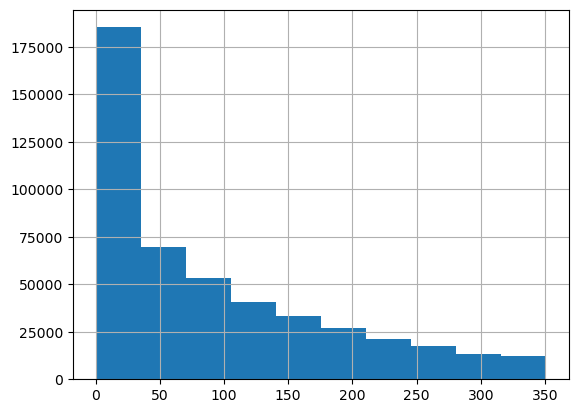

In [113]:
diff_date.hist()

Создадим датафрейм со значениями квантилей и соответствующими значениями дней перерыва в покупках:

In [102]:
buyers = pd.DataFrame({
'persons': ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'],
'day':[diff_date.quantile(0.1),
         diff_date.quantile(0.2),
         diff_date.quantile(0.3),
         diff_date.quantile(0.4),
         diff_date.quantile(0.5),
         diff_date.quantile(0.6),
         diff_date.quantile(0.7),
         diff_date.quantile(0.8),
         diff_date.quantile(0.9),
         diff_date.quantile(1)]})
buyers 



,persons,day
0,10%,0.0
1,20%,2.0
2,30%,18.0
3,40%,37.0
4,50%,61.0
5,60%,89.0
6,70%,125.0
7,80%,172.0
8,90%,238.0
9,100%,351.0


array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

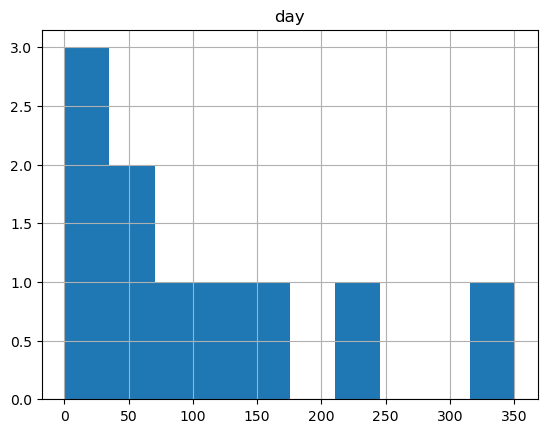

In [103]:
buyers.hist()

### Вывод: 

Можно заметить, что после 172 дней, время перерыва между последней покупкой и новой покупкой начинает значительно увеличиваться. 

80% покупателей преобретает товар до этого времени. Их в расслыку включать не стоит, так как они и без того являются лояльными. 

А вот оставшихся 20% будем стимулировать преобрести товар с помощью Push-уведомлений, напоминая им об акциях и предложениях на 173 день без покупки. 